# i. Perkenalan

**Nama** : Alfarabi

**Batch** : BSD 005

**Dataset** : [Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

**Problem Statement**: Analisis dataset "Uber dan Lyft Dataset Boston, MA" bertujuan untuk mengeksplorasi pola permintaan, perbandingan layanan, preferensi pelanggan, dan tren pasar untuk memberikan wawasan operasional yang dapat digunakan untuk meningkatkan layanan dan efisiensi operasional.

**Objective** : Tujuan analisis dataset Uber dan Lyft di Boston adalah untuk memahami pola perjalanan, tarif, tren musiman, preferensi pelanggan, dan dampak geografis layanan ride-sharing tersebut terhadap transportasi dan lalu lintas di Boston.

# ii. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
import pickle
import json
import warnings


from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from phik.report import plot_correlation_matrix
from sklearn.linear_model import LinearRegression

# iii. Data Loading

Data yang diambil merupakan dataset Uber dan Lyft untuk melakukan linear regression model, data diambil dari Kaggle.com

In [3]:
# Load dataset
df_ori = pd.read_csv('rideshare_kaggle.csv')

# Duplicate dataset
df = df_ori.copy()

# Show 5 data
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# Check dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari rangkuman data diatas didapat :
* RangeIndex: 693071
* Column  : 57

In [5]:
# Cek duplikasi data
df.duplicated().sum()

0

Dari data diatas dapat dilihat bahwa tidak ada duplikat data.

In [6]:
# Melihat jumlah unique value dari setiap kolom
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

Dari data diatas saya ingin melihat jumlah unique value yang ada di kolom.

In [7]:
# Drop kolom
df = df.drop(columns=['id','timestamp','datetime','product_id'])

Dari proses diata saya menghapus kolom yang tidak diperlukan dari dataset.

In [8]:
# Memisahkan kolom numeric dan kolom categoric
numeric = []
categoric = []
for i in df.columns.tolist():
    if df[i].nunique()>20:
        numeric.append(i)
    else:
        categoric.append(i)

In [9]:
numeric

['hour',
 'price',
 'distance',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'windGustTime',
 'visibility',
 'temperatureHigh',
 'temperatureHighTime',
 'temperatureLow',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'visibility.1',
 'ozone',
 'sunriseTime',
 'sunsetTime',
 'precipIntensityMax',
 'temperatureMin',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime']

In [10]:
categoric

['day',
 'month',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'name',
 'surge_multiplier',
 'latitude',
 'longitude',
 'short_summary',
 'long_summary',
 'icon',
 'uvIndex',
 'moonPhase',
 'uvIndexTime']

Dari proses diatas saya ingin memisahkan antara kolom numeric dengan kolom categoric.

In [11]:
# Cek missing value
df.isnull().sum()

hour                               0
day                                0
month                              0
timezone                           0
source                             0
destination                        0
cab_type                           0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
t

Dari data diatas dapat disimpulkan bahwa yang memiliki missing value hanya pada kolom price.

In [12]:
# Drop missing value pada kolom price
df = df.dropna(subset=['price'])

Dari proses diatas saya ingin menghilangkan missing value dari kolom price.

In [13]:
# Cek missing value
df.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

Dari data diatas dapat dilihat bahwa sudah tidak ada lagi missing value pada masing-masing kolom.

In [14]:
df.describe()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,...,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05,637976.000000,6.379760e+05
mean,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,35.87844,...,0.037369,1.544044e+09,33.456171,1.544042e+09,45.259945,1.544047e+09,29.729028,1.544048e+09,41.995876,1.544048e+09
std,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,7.91726,...,0.055216,6.912268e+05,6.466349,6.902087e+05,5.644414,6.901597e+05,7.109907,6.872011e+05,6.935538,6.911036e+05
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.13000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,31.91000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.90000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.660000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,40.01000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,57.22000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Dari data diatas menunjukan nilai count, mean, std, min, 25%, 50%, 75%, max dari setiap kolom.

In [15]:
# Cek nama kolom
df.columns

Index(['hour', 'day', 'month', 'timezone', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
     

Dari data diatas menunjukan nama kolom yang ada di dataset.

# iv. Exploratory Data Analysis (EDA)

1. Objective :  Melakukan analisis distribusi price

c:\Users\Alfarabi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


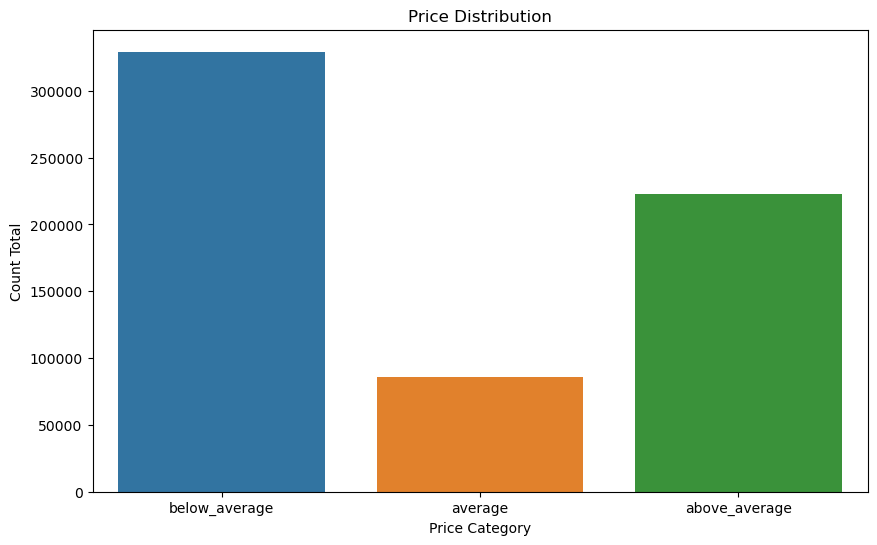

In [16]:
# Menghitung rata-rata salary
average_price = df['price'].mean()

# Menentukan threshold untuk upper_price dan lower_price (misal: 10% dari rata-rata)
threshold = 0.1 * average_price

# Menghitung upper_price, average_price, dan lower_price
upper_price = average_price + threshold
lower_price = average_price - threshold

# Menambahkan kolom 'price_category' berdasarkan kondisi
df['price_category'] = pd.cut(df['price'], bins=[-np.inf, lower_price, upper_price, np.inf], labels=['below_average', 'average', 'above_average'])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='price_category', data=df, order=['below_average', 'average', 'above_average'])
plt.title('Price Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count Total')
plt.show()


Dari tabel informasi bar chart diatas dapat dilihat bahwa, distribusi price di bagian `below_average` lebih besar. 

2. Objective : Distribusi waktu (jam/hari) dari permintaan layanan Uber dan Lyft di Boston?

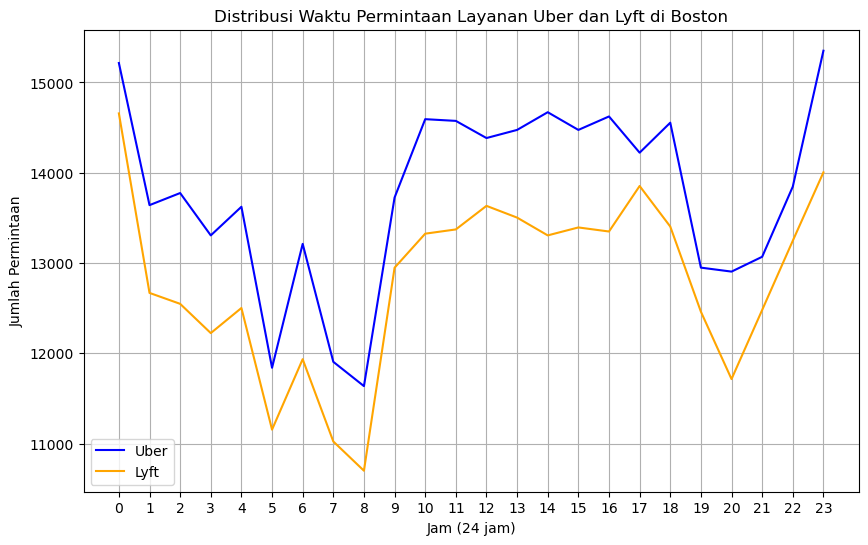

In [17]:
# Pisahkan df berdasarkan layanan (Uber dan Lyft)
uber_df = df[df['cab_type'] == 'Uber']
lyft_df = df[df['cab_type'] == 'Lyft']

# Hitung distribusi waktu (jam) untuk Uber
uber_hour_distribution = uber_df['hour'].value_counts().sort_index()

# Hitung distribusi waktu (jam) untuk Lyft
lyft_hour_distribution = lyft_df['hour'].value_counts().sort_index()

# Plot distribusi waktu (jam) untuk Uber dan Lyft dalam satu grafik
plt.figure(figsize=(10, 6))

# Plot distribusi waktu (jam) untuk Uber
plt.plot(uber_hour_distribution.index, uber_hour_distribution.values, label='Uber', color='blue')

# Plot distribusi waktu (jam) untuk Lyft
plt.plot(lyft_hour_distribution.index, lyft_hour_distribution.values, label='Lyft', color='orange')

# Menambahkan judul, label sumbu, legend, dan grid
plt.title('Distribusi Waktu Permintaan Layanan Uber dan Lyft di Boston')
plt.xlabel('Jam (24 jam)')
plt.ylabel('Jumlah Permintaan')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

Dari grafik diatas menunjukan:
- Permintaan Uber lebih tinggi daripada Lyft di hampir semua jam. Hal ini dapat dilihat dari garis biru yang selalu berada di atas garis oranye pada kedua grafik.
- Permintaan Uber dan Lyft mencapai puncaknya antara jam 7 malam dan 10 malam.
- Permintaan Uber dan Lyft paling rendah antara jam 4 pagi dan 7 pagi. Hal ini menunjukkan bahwa kedua layanan ini paling sedikit digunakan pada jam-jam awal pagi.

3. Objective: Melihat distribusi perjalanan per hari pada bulan November.

Text(0.5, 1.0, 'Number of trips Vs days of September')

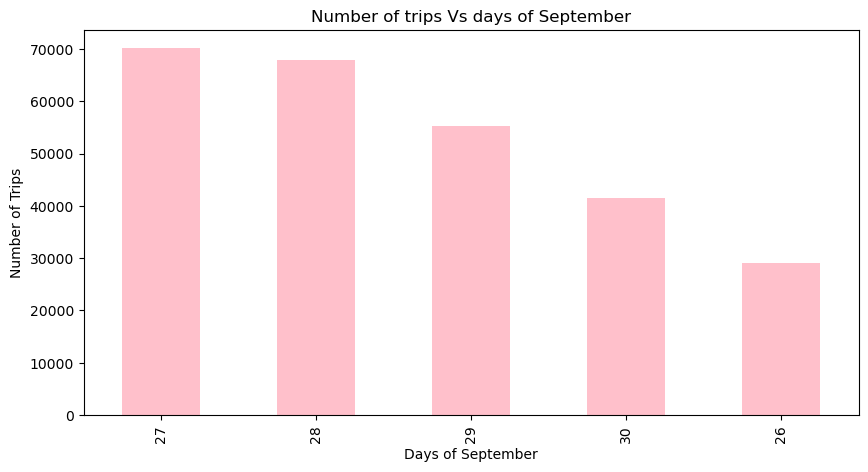

In [18]:
months = df['day'][df['month']==11].value_counts()
months.plot(kind='bar', color= 'pink', figsize=(10, 5))
plt.xlabel('Days of September')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of September')

4. Objective: Melihat distribusi perjalanan per hari pada bulan Desember.

Text(0.5, 1.0, 'Number of trips Vs days of december')

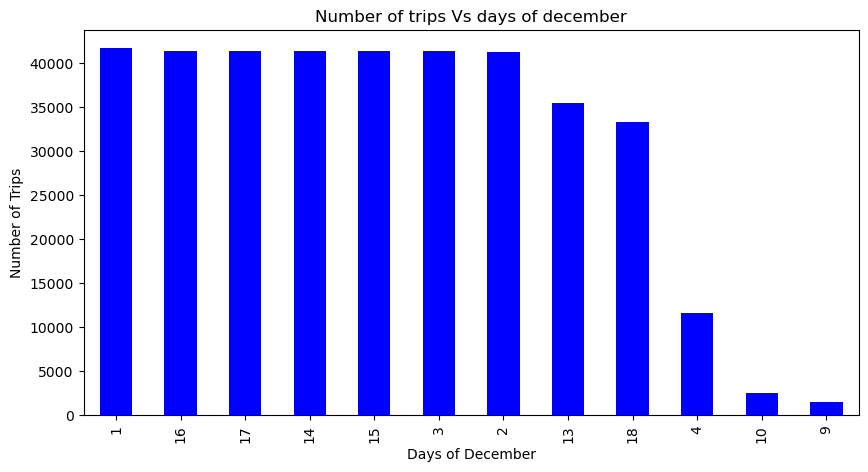

In [19]:
months = df['day'][df['month']==12].value_counts()
months.plot(kind='bar', color= 'blue', figsize=(10, 5))
plt.xlabel('Days of December')
plt.ylabel('Number of Trips' )
plt.title( 'Number of trips Vs days of december')

Dari data diatas dapat dilihat permintaan layanan terendah yaitu pada hari ke 4, 10, dan 9

5. Objective : Melihat jumlah data yang dikelompokkan berdasarkan month dari DataFrame

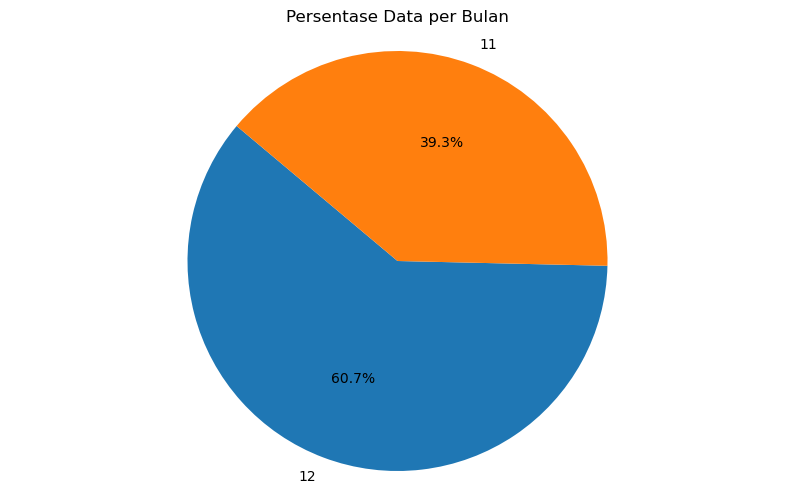

In [20]:
# Menghitung jumlah data berdasarkan bulan
calculate = df.groupby('month')['month'].sum().sort_values(ascending=False)

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(calculate.values, labels=calculate.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Data per Bulan')
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran yang sebenarnya
plt.show()

Dari data diatas dapat dilihat bahwa hanya terdapat bulan 11 dan 12 di dataset. itu berarti data di ambil pada bulan 11-12 dan keseluruhan data di dominasi pada bulan 12.

6. Objective : Melihat distribusi perjalanan berdasarkan Destination.

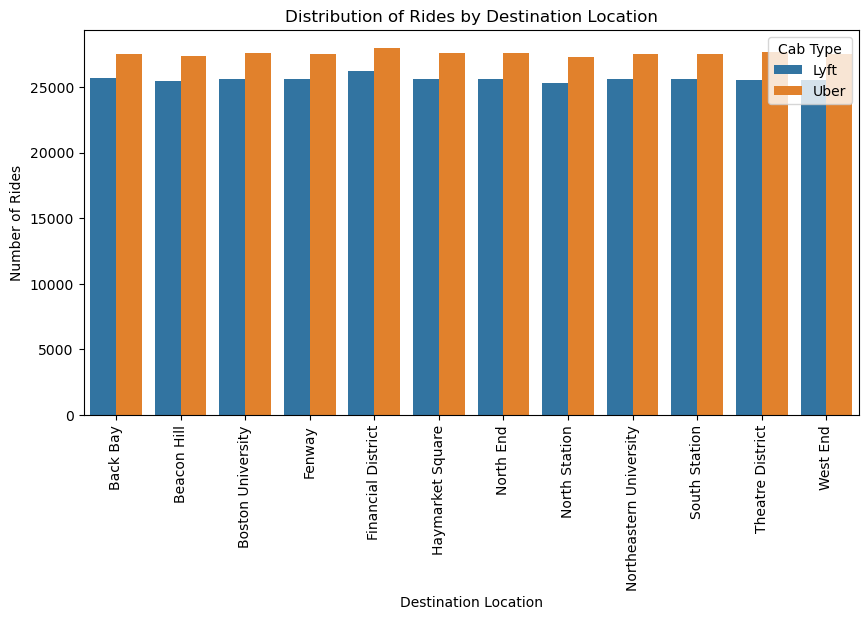

In [21]:
# Hitung rides by destination location and cab type
destination_counts = df.groupby(['destination', 'cab_type']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='destination', y='count', hue='cab_type', data=destination_counts)
plt.xlabel('Destination Location')
plt.ylabel('Number of Rides')
plt.title('Distribution of Rides by Destination Location')
plt.xticks(rotation=90)
plt.legend(title='Cab Type')
plt.show()


Dari grafik diatas dapat kita lihat bahwa permintaan Uber secara keseluruhan lebih tinggi daripada Lyft. Hal ini dapat dilihat dari garis biru yang selalu berada di atas garis oranye pada grafik.

7. Objective: Melihat distribusi harga berdasarkan suhu.

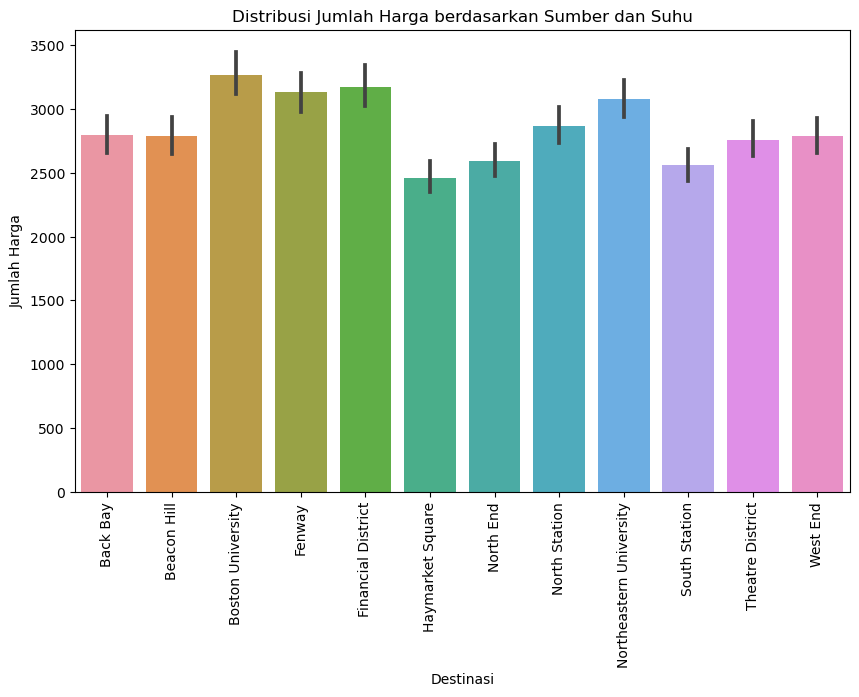

In [22]:
# Menghitung jumlah harga berdasarkan sumber (destination) dan suhu (temperature) dari data frame
calculate = df.groupby(['destination', 'temperature'])['price'].sum().reset_index()

# Membuat plot bar untuk membandingkan jumlah harga berdasarkan sumber (destination) dan suhu (temperature)
plt.figure(figsize=(10, 6))
sns.barplot(data=calculate, x='destination', y='price')
plt.title('Distribusi Jumlah Harga berdasarkan Sumber dan Suhu')
plt.xlabel('Destinasi')
plt.ylabel('Jumlah Harga')
plt.xticks(rotation=90)  # Mengatur label sumbu x agar miring untuk memperjelas
plt.show()

Berdasarkan dari data diatas dapat dilihat kenaikan harga paling tinggi terjadi pada Boston Univertsity pada saat tempetature tinggi.

# v. Feature Engineering

Karena akan melakukan regresi, data akan dipisahkan menjadi fitur `X` dan label/target `y`. Selanjutnya, kedua dataset ini juga akan dibagi menjadi `train-set` dan `test-set`.

Sebelum membagi data, saya akan membuat variabel baru bernama `data_inf` yang digunakan untuk melatih model inferensi sehingga tidak perlu melakukan input manual saat menggunakan inferensi.

Lalu menyimpan dataset random ke `csv`.

In [23]:
# Menyimpan 1 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf
data_inf = df.sample(1, random_state=0)

# Menghapus data inference dari df
df.drop(data_inf.index, inplace=True)

# Melakukan reset index untuk data_inf dan df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Menghapus target di data_inf
data_inf.drop(['price'], axis=1, inplace=True)

# Simpan ke csv
data_inf.to_csv('data_inf.csv')

### Split Between `X` (Features/Variables) and `y` (Target/Label)

Saya akan memisahkan antara `features` dengan `target`.

In [24]:
# Splitting feature X & y
X= df.drop('price', axis=1)
y = df['price']

X.head()

,hour,day,month,timezone,source,destination,cab_type,name,distance,surge_multiplier,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_category
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,below_average
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,below_average
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,below_average
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,above_average
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,below_average


### Split Between Train-set and Test-set

Saya akan mengelompokan dataset menjadi 2 bagian yaitu `train set` untuk dilakukan training, dan `test set` untuk dilakukan evaluasi.

In [25]:
# Splitting between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

print('X Train size : ', X_train.shape)
print('X Test size : ', X_test.shape)
print('y Train size : ', y_train.shape)
print('y Test size : ', y_test.shape)

X Train size :  (510380, 53)
X Test size :  (127595, 53)
y Train size :  (510380,)
y Test size :  (127595,)


In [26]:
# Cek X_train
X_train.head()

,hour,day,month,timezone,source,destination,cab_type,name,distance,surge_multiplier,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_category
210654,9,30,11,America/New_York,Financial District,Northeastern University,Uber,UberX,3.30,1.0,...,1543593600,28.68,1543575600,42.58,1543600800,27.26,1543568400,40.53,1543611600,below_average
540363,1,30,11,America/New_York,Beacon Hill,Haymarket Square,Uber,WAV,1.35,1.0,...,1543510800,35.20,1543550400,44.96,1543510800,31.40,1543550400,38.85,1543510800,below_average
603650,1,14,12,America/New_York,North Station,Boston University,Uber,UberXL,3.01,1.0,...,1544716800,17.94,1544688000,33.88,1544731200,13.71,1544688000,32.93,1544734800,average
111982,12,14,12,America/New_York,Beacon Hill,Fenway,Lyft,Lux Black,2.37,1.0,...,1544806800,27.11,1544781600,46.61,1544814000,27.76,1544781600,43.85,1544817600,above_average
429319,5,27,11,America/New_York,Boston University,Financial District,Uber,Black,4.72,1.0,...,1543338000,36.34,1543377600,47.11,1543320000,32.26,1543377600,44.14,1543320000,above_average


In [27]:
# Cek X_test
X_test.head()

,hour,day,month,timezone,source,destination,cab_type,name,distance,surge_multiplier,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price_category
71158,16,27,11,America/New_York,Beacon Hill,Fenway,Uber,UberX,2.37,1.0,...,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000,below_average
25801,13,27,11,America/New_York,Fenway,Beacon Hill,Lyft,Lux Black XL,2.63,1.0,...,1543338000,36.37,1543377600,47.06,1543320000,32.40,1543377600,44.15,1543320000,above_average
524725,17,2,12,America/New_York,West End,Boston University,Lyft,Lux,2.88,1.0,...,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000,above_average
430837,5,4,12,America/New_York,Beacon Hill,Northeastern University,Uber,UberXL,2.63,1.0,...,1543942800,25.41,1543982400,42.42,1543899600,20.01,1543982400,37.16,1543899600,average
500249,15,26,11,America/New_York,Financial District,Fenway,Lyft,Lyft,4.43,2.0,...,1543251600,40.74,1543233600,46.27,1543255200,37.46,1543291200,43.78,1543244400,above_average


Setelah itu saya memisahkan antara `categorical` dengan `numereical` pada X_train ke dalam variable baru.

In [28]:
cat_col = X_train.select_dtypes(include='object').columns.tolist()
print(f'categorical columns: {cat_col}')

num_col = X_train.select_dtypes(include=np.number).columns.tolist()
print(f'numerical columns: {num_col}')

categorical columns: ['timezone', 'source', 'destination', 'cab_type', 'name', 'short_summary', 'long_summary', 'icon']
numerical columns: ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']


### Handling Outlier

Saya akan mengelompokan antara yang memilikim nilai normal, skew, dan extreme skew.

In [29]:
# Inisialisasi daftar untuk menampung fitur dengan tingkat skewness
normal = []
skew = []
extreme_skew = []

# Iterasi melalui fitur numerik
for i in num_col:
    # Menghitung skewness dari setiap fitur
    skewness = X_train[i].skew()
    # Memisahkan fitur berdasarkan tingkat skewness
    if -0.5 < skewness < 0.5:
        normal.append(i)
    elif -1 <= skewness <= -0.5 or 0.5 <= skewness <=1:
        skew.append(i)
    elif skewness < 1 or skewness > 1:
        extreme_skew.append(i)

# Menampilkan hasil klasifikasi fitur berdasarkan skewness
print('normal:', normal)
print('skew:', skew)
print('extreme skew:', extreme_skew)

normal: ['hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']
skew: ['distance', 'temperature', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMax']
extreme skew: ['surge_multiplier', 'latitude', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'uvIndex', 'visibility.1', 'apparentTemperatureMin']


Melihat skew dari y_train.

In [30]:
# Cek skew dari y_train
y_train.skew()

1.048443114498559

Mengecek jumlah baris dan kolom sebelum dilakukan proses handling outlier.

In [31]:
X_train.shape

(510380, 53)

In [32]:
y_train.shape

(510380,)

Lalu saya melakukan penghapusan outlier pada data dengan menggunakan metode normal(z-score), IQR, dan extreme skew (3 times IQR).

In [33]:
# Menghapus outlier pada dataset dengan metode normal (z-score)
def drop_outliers_normal(X_train, normal):
    for col in normal:
        avg = X_train[col].mean()
        std = X_train[col].std()
        upper_limit =  avg + 3 * std
        lower_limit = avg - 3 * std
        X_train.drop(X_train[(X_train[col] > upper_limit) | (X_train[col] < lower_limit)].index, inplace=True)

# Menghapus outlier pada dataset dengan metode interquartile range (IQR)
def drop_outliers_skewed(X_train, skew):
    for col in skew:
        iqr = 1.5 * (np.percentile(X_train[col], 75) - np.percentile(X_train[col], 25))
        upper_limit = np.percentile(X_train[col], 75) + iqr
        lower_limit = np.percentile(X_train[col], 25) - iqr
        X_train.drop(X_train[(X_train[col] > upper_limit) | (X_train[col] < lower_limit)].index, inplace=True)

# Menghapus outlier pada dataset dengan metode extreme skew (3 times IQR)
def drop_outliers_skewed_extreme(X_train, extreme_skew):
    for col in extreme_skew:
        iqr = 3 * (np.percentile(X_train[col], 75) - np.percentile(X_train[col], 25))
        upper_limit = np.percentile(X_train[col], 75) + iqr
        lower_limit = np.percentile(X_train[col], 25) - iqr
        X_train.drop(X_train[(X_train[col] > upper_limit) | (X_train[col] < lower_limit)].index, inplace=True)

In [34]:
# Menghilangkan outlier dengan metode normal pada fitur-fitur tertentu
drop_outliers_normal(X_train, ['hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'])

# Menghilangkan outlier dengan metode skewed pada fitur-fitur tertentu
drop_outliers_skewed(X_train, ['distance', 'temperature', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMax'])

# Menghilangkan outlier dengan metode extreme skewed pada fitur-fitur tertentu
drop_outliers_skewed_extreme(X_train, ['surge_multiplier', 'latitude', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'uvIndex', 'visibility.1', 'apparentTemperatureMin'])

# Menyesuaikan label target `y_train` sesuai dengan indeks `X_train`
y_train = y_train.loc[X_train.index]

In [35]:
# Cek baris dan kolom setelah dilakukan penghapusan outlier
X_train.shape

(151143, 53)

In [36]:
# Cek baris dan kolom setelah dilakukan penghapusan outlier
y_train.shape

(151143,)

Dari proses diatas menampilkan bahwa proses handling outlier berhasil, bisa dilihat dari jumlah baris yang awalnya *510380* menjadi *151143*.

### Missing Value Handling

Pada proses berikut saya hanya mengecek missing value karena sudah dilakukan proses cleaning data pada data loading.

In [37]:
# Check missing value in X_test
X_test.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTe

In [38]:
# Check missing value in X_train
X_train.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTe

In [39]:
# Check missing value in y_test
y_test.isnull().sum()

0

In [40]:
# Check missing value in y_train
y_train.isnull().sum()

0

### Feature Selection

Fitur yang akan masuk ke model diseleksi berdasarakan adakah korelasinya dengan target. yang dilakukan pada bagian ini adalah menghapus (drop) fitur yang tidak ada pengaruhnya ke target. dengan cara cek korelasi nya.

#### Correlation for Feature Selection

In [41]:
# Memisahkan kolom supaya perhitungan phik gak kebanyakan
set_1 = X_train.columns.tolist()[0:11]
set_2 = X_train.columns.tolist()[11:22]
set_3 = X_train.columns.tolist()[22:33]
set_4 = X_train.columns.tolist()[33:44]
set_5 = X_train.columns.tolist()[44:53]

In [42]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The number of unique values of variable datetime is large")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Menggabungkan data pelatihan (fitur dari set_1 dan target)
combined_train_data = pd.concat([X_train[set_1], y_train], axis=1)
combined_train_data.phik_matrix()['price']

interval columns not set, guessing: ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude', 'price']


c:\Users\Alfarabi\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable surge_multiplier for analysis 1. Dropping this column
  warnings.warn(


hour           0.000000
day            0.000000
month          0.007383
source         0.168372
destination    0.194620
cab_type       0.198448
name           0.711555
distance       0.494142
latitude       0.000000
price          1.000000
Name: price, dtype: float64

In [43]:
# Menggabungkan data pelatihan (fitur dari set_2 dan target)
combined_train_data = pd.concat([X_train[set_2], y_train], axis=1)
combined_train_data.phik_matrix()['price']

interval columns not set, guessing: ['longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'price']


c:\Users\Alfarabi\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable precipIntensity for analysis 1. Dropping this column
  warnings.warn(
c:\Users\Alfarabi\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable precipProbability for analysis 1. Dropping this column
  warnings.warn(


longitude              0.006501
temperature            0.000000
apparentTemperature    0.002907
short_summary          0.004793
long_summary           0.000000
humidity               0.000000
windSpeed              0.000000
windGust               0.017413
windGustTime           0.008030
price                  1.000000
Name: price, dtype: float64

Kemudian saya akan membuat fungsi untuk mengecek korelasi menggunakan `phik` dan akan di tampilkan dengan `heatmap` untuk mengecek data yang memiliki nilai korelasi dengan kolom price.

In [44]:
# Membuat fungsi heatmap
def plot_phik(kolom):
    combined_train_data = pd.concat([X_train[kolom], y_train], axis=1)
    phik_overview = combined_train_data.phik_matrix()

    plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(10,10))
    plt.tight_layout()

interval columns not set, guessing: ['hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude', 'price']


c:\Users\Alfarabi\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable surge_multiplier for analysis 1. Dropping this column
  warnings.warn(


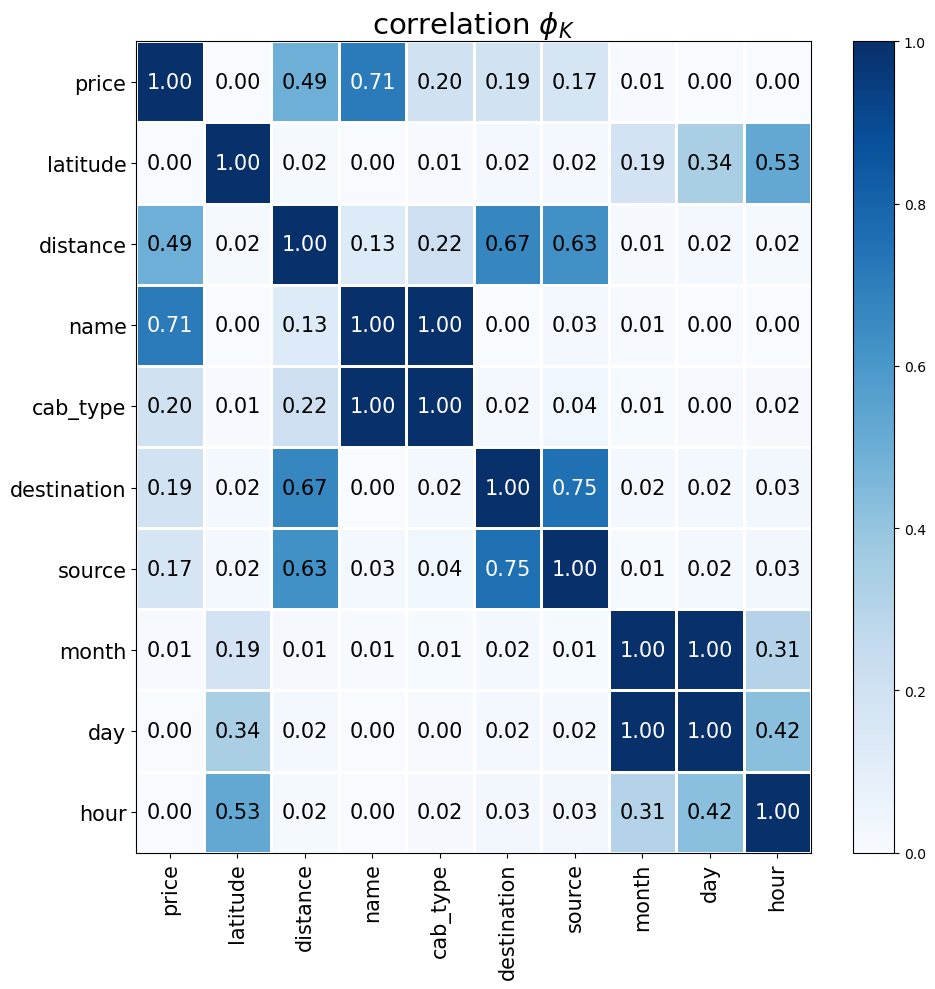

In [45]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The number of unique values of variable datetime is large")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Ploting
plot_phik(set_1)

interval columns not set, guessing: ['longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'price']


c:\Users\Alfarabi\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable precipIntensity for analysis 1. Dropping this column
  warnings.warn(
c:\Users\Alfarabi\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable precipProbability for analysis 1. Dropping this column
  warnings.warn(


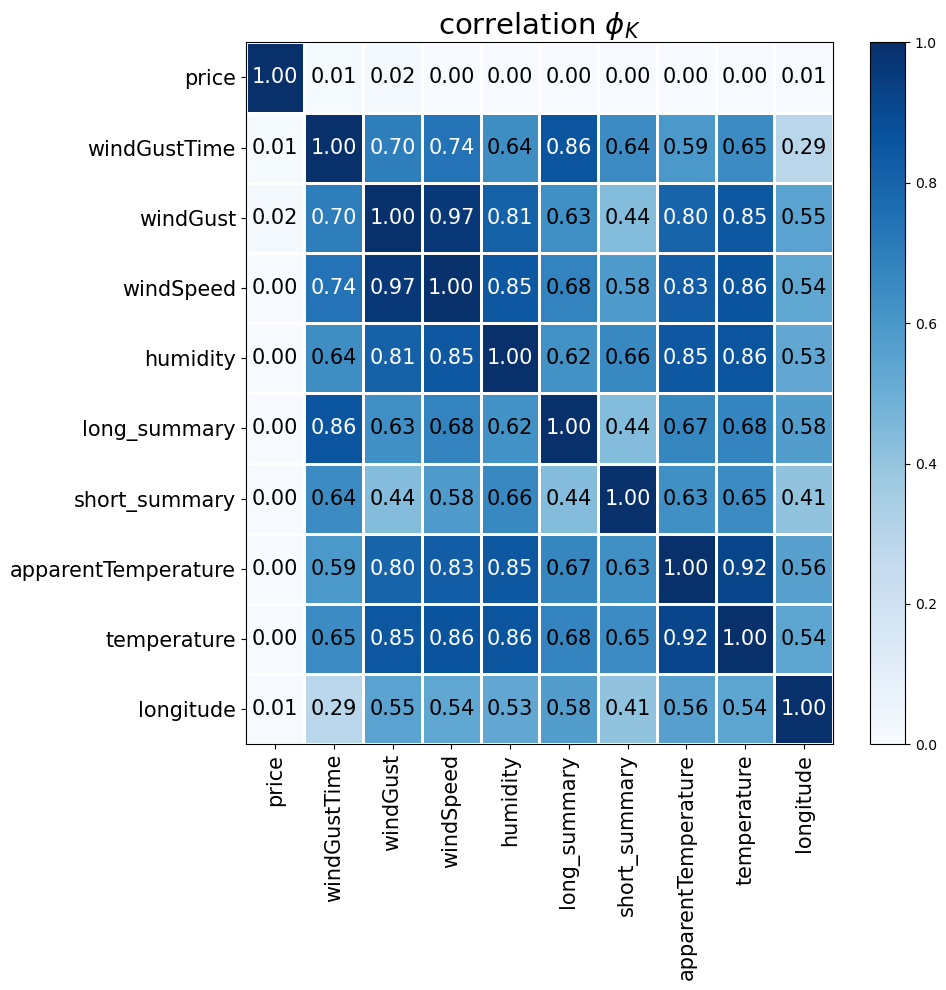

In [46]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Ploting
plot_phik(set_2)

interval columns not set, guessing: ['visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'price']


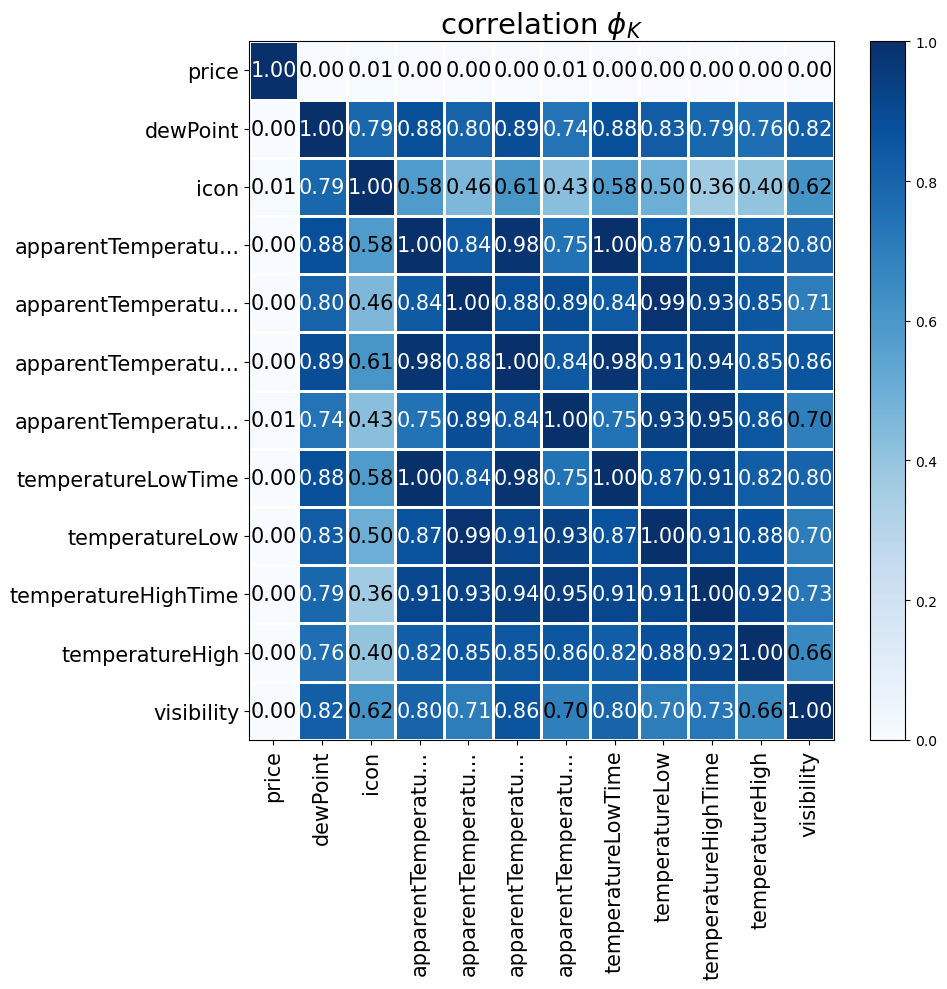

In [47]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Ploting
plot_phik(set_3)

interval columns not set, guessing: ['pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'price']


c:\Users\Alfarabi\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable uvIndex for analysis 1. Dropping this column
  warnings.warn(


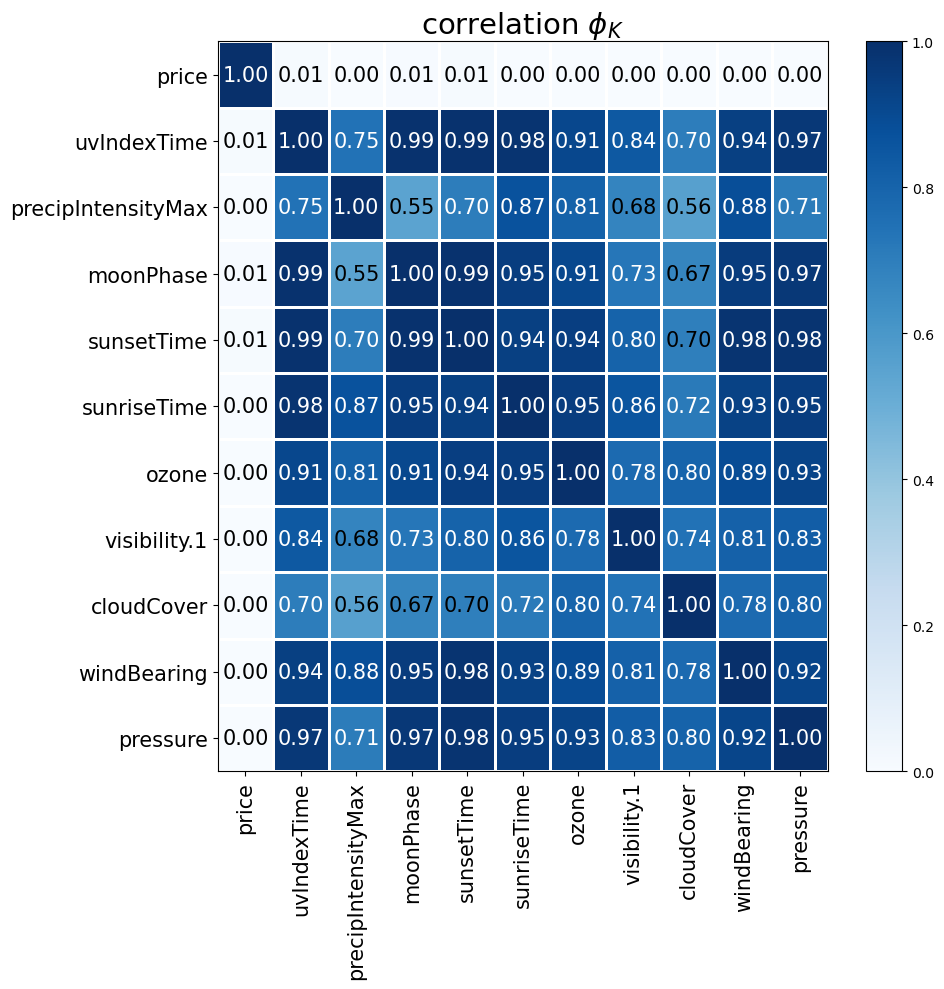

In [48]:
# Menonaktifkan peringatan
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
warnings.filterwarnings("ignore", message="Not enough unique value for variable timezone for analysis")

# Ploting
plot_phik(set_4)

Saya menggunakan threshold 0.3 sehingga fitur yang dipakai adalah name, surge_multiplier, distance

In [49]:
# Variable baru
features = ['name', 'surge_multiplier', 'distance']

In [50]:
# Variable baru untuk dimasukan ke X_train
X_train_features = X_train[features]
X_test_features = X_test[features]

In [51]:
# Menampilkan lima baris pertama dari dataset X_train_features
X_train_features.head()

,name,surge_multiplier,distance
210654,UberX,1.0,3.30
540363,WAV,1.0,1.35
111982,Lux Black,1.0,2.37
16497,UberX,1.0,0.39
459988,UberXL,1.0,1.03


In [52]:
# Menampilkan dimensi atau ukuran dari dataset X_train_features
X_train_features.shape

(151143, 3)

### Split Between Numerical and Categorical Column

Memisahkan kolom numerical dengan kolom categorical setelah dilakukan feature selection.

In [53]:
# Split num cat col 
num_col = X_train_features.select_dtypes(include=np.number).columns.tolist()
cat_col = X_test_features.select_dtypes(include=['object']).columns.tolist()

print(f'numerical columns: {num_col}')
print(f'categorical columns:{cat_col}')

numerical columns: ['surge_multiplier', 'distance']
categorical columns:['name']


In [54]:
# Split train test based on column types
X_train_num = X_train_features[num_col]
X_test_num = X_test_features[num_col]

X_train_cat = X_train_features[cat_col]
X_test_cat = X_test_features[cat_col]

In [55]:
# Cek value 5 teratas dari X_train_num
X_train_num.head()

,surge_multiplier,distance
210654,1.0,3.30
540363,1.0,1.35
111982,1.0,2.37
16497,1.0,0.39
459988,1.0,1.03


In [56]:
# Cek value 5 teratas dari X_train_cat
X_train_cat.head()

,name
210654,UberX
540363,WAV
111982,Lux Black
16497,UberX
459988,UberXL


### Check Cardinality

Pada proses ini saya hanya melakukan pengecekan cardinality, karena tidak ada yang bisa dikelompokan dari unique value pada kolom `name`.

In [57]:
# Cek jumlah unique value pada X_train_cat
X_train_cat.nunique()

name    12
dtype: int64

In [58]:
# Cek unique value pada kolom name di X_train_cat
X_train_cat.name.unique()

array(['UberX', 'WAV', 'Lux Black', 'UberXL', 'Lyft', 'UberPool',
       'Lux Black XL', 'Lyft XL', 'Lux', 'Black SUV', 'Shared', 'Black'],
      dtype=object)

In [59]:
# Cek cardinality 
num_cols = X_train_features.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train_features.select_dtypes(include=object).columns.tolist()

print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['surge_multiplier', 'distance']
categorical columns : ['name']


### Feature Scaling

Pada proses fitur scaling saya akan menggunakan `minmaxscaler`. alasan saya menggunakan `minmaxscaler` adalah pendekatan yang sederhana dikarenakan fitur akan diubah menjadi nilai berkisar 0 dan 1.

In [60]:
# Scaling
scaler =  MinMaxScaler()
scaler.fit(X_train_num) # .fit() hanya boleh dilakukan terhadapa train, tidak boleh di test-set

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_test_num_scaled

array([[0.        , 0.43518519],
       [0.        , 0.48333333],
       [0.        , 0.52962963],
       ...,
       [0.        , 0.45555556],
       [0.        , 0.2037037 ],
       [0.        , 0.53148148]])

### Feature Encoding

Pada proses feature encoding saya memakai `OneHotEncoder` karena data yang saya miliki adalah data kategorikal yang memiliki fitur yang berisi label atau kategori, tetapi urutannya tidak bermakna.

In [61]:
# Display
X_train_cat.head()

,name
210654,UberX
540363,WAV
111982,Lux Black
16497,UberX
459988,UberXL


In [62]:
# Check unique value
df.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [63]:
# Inisialisasi encoder
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat = X_train_features[cat_cols]
X_test_cat = X_test_features[cat_cols]

# Melakukan one-hot encoding pada data kategorikal untuk X_train dan X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

print("X_train_num_scaled:")
print(X_train_cat_encoded)

X_train_num_scaled:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### Concate Between Numerical and Categorical Columns

Pada proses saya menggabungkan antara kolom numerical dengan kolom categorical pada X_train_final dan X_test_final.

In [64]:
# Concate columns
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [65]:
# Cek hasil concate
X_train_final

array([[0.        , 0.60740741, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.2462963 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.43518519, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.81111111, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.22407407, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22222222, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
# Cek hasil concate
X_test_final

array([[0.        , 0.43518519, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.48333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.52962963, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.45555556, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2037037 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53148148, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# vi. Model Definition

Algoritma yang akan digunakan dalam model ini adalah linear regression. Linear Regression dipilih karena beberapa alasan:

- **Mudah Dipahami dan Jelas dalam Interpretasi**: Linear Regression adalah salah satu metode yang paling simpel dan mudah dipahami dalam analisis prediksi.

- **Mengatasi Hubungan Linier**: Model Linear Regression cocok digunakan ketika diasumsikan bahwa hubungan antara variabel independen dan variabel dependen bersifat linier.

- **Interpretasi Koefisien**: Linear Regression memberikan nilai koefisien yang bisa langsung diinterpretasikan untuk setiap variabel independen, memungkinkan penilaian yang jelas terhadap pengaruh variabel tersebut terhadap variabel target.

Alasan menggunakan Mean Absolute Error (MAE) sebagai metrik evaluasi dapat disebabkan oleh beberapa pertimbangan yang meliputi:

- **Interpretasi yang Sederhana**: MAE memiliki interpretasi yang lebih intuitif dibandingkan dengan metrik lain seperti Mean Squared Error (MSE). MAE mengukur rata-rata dari absolute selisih antara prediksi dan nilai sebenarnya, sehingga hasilnya lebih mudah dipahami secara konseptual.

- **Sederhana dan Cukup Informatif**: MAE merupakan metrik yang sederhana tetapi cukup informatif dalam mengevaluasi performa model. Dengan fokus pada kesalahan absolut, MAE memberikan gambaran yang jelas tentang seberapa baik model melakukan prediksi.

- **Skala Linier**: MAE memberikan bobot yang sama untuk setiap kesalahan prediksi, tidak membesar jika kesalahan prediksi semakin besar seperti yang terjadi pada MSE. Hal ini bisa dianggap lebih adil dalam mengukur performa model terutama jika kita ingin menghindari peningkatan kesalahan yang besar.

In [67]:
# Model linear
model_lin = LinearRegression()

# vii. Model Training

Model yang saya pakai untuk menghitung data yang telah diproses yaitu dengan `Linear regression`.

In [68]:
# Training the model linear
model_lin.fit(X_train_final, y_train)

LinearRegression()

# viii. Model Evaluation

Pada proses ini saya melakukan evaluasi terhadap train set dan test set untuk mengetahui akurasi dari model yang telah dibuat.

In [69]:
# Predict Train-set dan Test-set
y_pred_train = model_lin.predict(X_train_final)
y_pred_test = model_lin.predict(X_test_final)

In [70]:
# Cek value
y_pred_train

array([12.94958496,  7.52233887, 22.75610352, ..., 15.98522949,
       12.12255859, 27.49804688])

In [71]:
# Cek value
y_pred_test

array([10.36914062, 32.35534668, 19.08691406, ..., 17.97705078,
       28.16552734, 11.27990723])

In [72]:
# Model Evaluation using MAE
print(f'Error - Train Set {mean_absolute_error(y_train,y_pred_train)}')
print(f'Error - Test Set {round(mean_absolute_error(y_test,y_pred_test),2)}')

Error - Train Set 1.6402971654172291
Error - Test Set 1.9


Kesimpulan dari hasil Mean Absolute Error (MAE) adalah model memiliki kinerja yang serupa di antara data train dan test, dengan nilai error sekitar 1.64 untuk data train dan 1.9 untuk data test. Hal ini menunjukkan bahwa model cenderung tidak mengalami overfitting pada data train.

In [73]:
# Model Evaluation using R2 Score
print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))

R2 Score - Train Set :  0.9358707434458066
R2 Score - Test Set  :  0.8914179194136201


Hasil R2 Score yang tinggi pada kedua train set dan test set (0.936 dan 0.891, secara berturut-turut) menunjukkan bahwa model regresi yang digunakan cukup baik dalam menjelaskan variasi dalam data. Meskipun terdapat sedikit penurunan performa pada test set dibandingkan dengan train set, namun model masih dapat menggeneralisasi dengan baik terhadap data baru yang belum pernah dilihat sebelumnya.

# ix. Model Inference (in different notebook!)

Penjelasan di notebook `P1G4_Alfarabi_inference.ipynb`

# x. Model Saving for Inference Dataset

In [74]:
# Save the files!
with open ('model_lin.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(model_lin, file_1)
with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump(scaler,file_2)
with open('model_encoder.pkl', 'wb') as file_3:
    pickle.dump(encoder,file_3)
with open('num_col.txt', 'w') as file_4: # w = write
    json.dump(num_col,file_4)
with open('cat_col.txt', 'w') as file_5:
    json.dump(cat_col,file_5)

# xi. Kesimpulan

1. `Secara bisnis:` 
- Permintaan layanan ridesharing mencapai puncaknya pada malam hari antara pukul 7 malam hingga 10 malam, menunjukkan penggunaan yang tinggi untuk pergi makan malam, acara sosial, atau pulang kerja.
- Uber memiliki permintaan yang lebih tinggi daripada Lyft di Boston, terutama pada pagi hari, menunjukkan dominasi Uber dalam - pangsa pasar ridesharing.
- Terdapat potensi untuk meningkatkan layanan pada jam-jam dengan permintaan rendah, seperti pagi hari, dengan strategi promosi atau diskon khusus.
- Ada peluang untuk mengembangkan jangkauan layanan ke area-area yang belum terlayani dengan baik di Boston, mengikuti pola permintaan yang ada.
- Kerjasama dengan bisnis lokal dapat membantu mengintegrasikan layanan ridesharing dengan kegiatan sehari-hari pelanggan dan meningkatkan penggunaan layanan tersebut.
- Dengan menganalisis pola permintaan ini, Uber dan Lyft dapat mengambil langkah-langkah strategis untuk memperkuat posisi mereka di pasar ridesharing Boston.

2. `Evaluasi model:`
  - Model Evaluation using MAE  
    **Train Set** : 1.6402971654172291  
    **Test Set**  : 1.9   
    dari hasil Mean Absolute Error (MAE) adalah model memiliki kinerja yang serupa di antara data train dan test, dengan nilai error sekitar 1.64 untuk data train dan 1.9 untuk data test. Hal ini menunjukkan bahwa model cenderung tidak mengalami overfitting pada data train.

  - Model Evaluation using R2 Score  
    **Train Set** :  0.9358707434458066  
    **Test Set**  :  0.8914179194136201  
    Hasil R2 Score yang tinggi pada kedua train set dan test set (0.936 dan 0.891, secara berturut-turut) menunjukkan bahwa model regresi yang digunakan cukup baik dalam menjelaskan variasi dalam data. Meskipun terdapat sedikit penurunan performa pada test set dibandingkan dengan train set, namun model masih dapat menggeneralisasi dengan baik terhadap data baru yang belum pernah dilihat sebelumnya.
    
3. `Kelebihan dan kelamahan model:` MAE (Mean Absolute Error) memiliki kelebihan sederhana dan intuitif serta kebal terhadap outlier, tetapi kurang sensitif terhadap perubahan dan tidak memberikan indikasi langsung tentang kualitas kesesuaian model. Di sisi lain, R2 Score memberikan insight tentang variance explained dan memiliki rentang nilai terstandarisasi, tetapi rentang nilainya tidak selalu sesuai untuk evaluasi model dan tidak robust terhadap outlier. Pemilihan antara kedua metrik ini tergantung pada preferensi analisis dan karakteristik khusus data dan model yang digunakan.

4. `Improve model:`  
Untuk meningkatkan model terhadap metrik MAE (Mean Absolute Error) dan R2 Score:

  - Meningkatkan Model untuk MAE:
  1. Tangani outlier dalam data.
  2. Lakukan pemilihan fitur yang lebih baik.
  3. Lakukan optimasi hyperparameter dengan cross-validation.
  4. Cobalah model ensemble seperti Random Forest atau Gradient Boosting.

  - Meningkatkan Model untuk R2 Score:
  1. Tambahkan fitur baru yang informatif.
  2. Coba model yang lebih kompleks atau teknik seperti polynomial regression.
  3. Periksa apakah diperlukan pemrosesan data tambahan.
  4. Gunakan metode cross-validation yang lebih baik.
  5. Pertimbangkan penggunaan regularisasi seperti Lasso atau Ridge.

Langkah-langkah ini dapat membantu meningkatkan kinerja model terhadap kedua metrik tersebut. Penting untuk memilih strategi yang sesuai dengan karakteristik data dan tujuan analisis.

# Conceptual Problems

1. Linear Regression adalah metode statistik untuk memodelkan hubungan linier antara variabel dependen dan variabel independen. Beberapa asumsi penting yang digunakan dalam Linear Regression meliputi hubungan linier antara variabel, homoskedastisitas (variansi residual konstan), independensi variabel independen, normalitas residual, tidak adanya multicollinearity, tidak adanya autokorelasi, dan skala interval untuk variabel. Memahami asumsi ini membantu mengevaluasi kecocokan model terhadap data dan interpretasi hasilnya dengan benar.

2. Slope dan intercept

In [75]:
slope = model_lin.coef_
intercept = model_lin.intercept_

print("Nilai Slope (Koefisien Regresi): ", slope)
print("Nilai Intercept: ", intercept)

Nilai Slope (Koefisien Regresi):  [0.00000000e+00 1.49833482e+01 7.44235860e+11 7.44235860e+11
 7.44235860e+11 7.44235860e+11 7.44235860e+11 7.44235860e+11
 7.44235860e+11 7.44235860e+11 7.44235860e+11 7.44235860e+11
 7.44235860e+11 7.44235860e+11]
Nilai Intercept:  -744235859573.1157


Kesimpulan dari nilai slope (koefisien regresi) dan intercept:

Nilai slope (koefisien regresi) menunjukkan dampak perubahan pada variabel independen terhadap variabel dependen. Namun, nilai yang sangat besar seperti pada contoh tersebut (bilangan miliar) mungkin menunjukkan masalah dengan skala data atau pengaruh yang tidak biasa.  
Nilai intercept adalah nilai perkiraan untuk variabel dependen ketika semua variabel independen adalah nol. Dalam konteks ini, nilai intercept yang sangat negatif (-744,235,859,573.1157) menunjukkan bahwa model mungkin tidak diinterpretasikan dengan benar karena nilai ini tidak wajar.